### Setup

In [2]:
from gensim.models.word2vec import Word2Vec
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Using the Google News trained data on 100 Billion words located here: https://code.google.com/archive/p/word2vec/

In [5]:
model = Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [6]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[(u'queen', 0.7118192911148071),
 (u'monarch', 0.6189674139022827),
 (u'princess', 0.5902431607246399),
 (u'crown_prince', 0.5499460697174072),
 (u'prince', 0.5377321243286133)]

### Positive and Negative words taken from here: http://www.enchantedlearning.com/wordlist/

In [307]:
with open('positive_words.txt', 'r') as infile:
    positive_words = infile.readlines()

with open('negative_words.txt', 'r') as infile:
    negative_words = infile.readlines()

def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(model[word].reshape((1,300)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values

positive_vecs = getWordVecs(positive_words)
negative_vecs = getWordVecs(negative_words)

### Plotting negative vs positive words using tSNE

In [105]:
ts = TSNE(2)
reduced_vecs = ts.fit_transform(np.concatenate((positive_vecs, negative_vecs)))

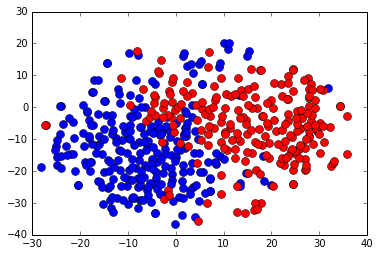

In [106]:
#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    if i < len(positive_vecs):
        #positive words colored blue
        color = 'b'
        label = 'positive'
    else:
        #negative words colored red
        color = 'r'
        label = 'negative'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color, label=label, markersize=8)
#plt.legend(loc='best')

### Using the model for sentiment analysis on tweets

In [316]:
with open('tweets.txt', 'r') as infile:
    tweets = infile.readlines()
#tweets_vec = getWordVecs(tweets)

In [315]:
tweets

['1\tThe Da Vinci Code book is just awesome.\n',
 "1\tthis was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.\n",
 '1\ti liked the Da Vinci Code a lot.\n',
 '1\ti liked the Da Vinci Code a lot.\n',
 "1\tI liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.\n",
 "1\tthat's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course.\n",
 '1\tI loved the Da Vinci Code, but now I want something better and different!..\n',
 '1\ti thought da vinci code was great, same with kite runner.\n',
 '1\tThe Da Vinci Code is actually a good movie...\n',
 '1\tI thought the Da Vinci Code was a pretty good book.\n',
 '1\tThe Da Vinci Code is one of the most beautiful movies ive ever seen.\n',
 '1\tThe Da Vinci Code is an * amazing * book, do not get me wrong.\n',
 '1\tthen I turn on the light and the radio and enjoy my Da Vinci Code.\n',
 '1\tThe Da Vinci Code w

### Getting the results for words classified for the four seasons

In [11]:
with open('summer_words.txt', 'r') as infile:
    summer_words = infile.readlines()

with open('spring_words.txt', 'r') as infile:
    spring_words = infile.readlines()
    
with open('winter_words.txt', 'r') as infile:
    winter_words = infile.readlines()

with open('fall_words.txt', 'r') as infile:
    fall_words = infile.readlines()
    
summer_vecs = getWordVecs(summer_words)
spring_vecs = getWordVecs(spring_words)
winter_vecs = getWordVecs(winter_words)
fall_vecs = getWordVecs(fall_words)

In [13]:
reduced_vecs = ts.fit_transform(np.concatenate((summer_vecs, spring_vecs, winter_vecs, fall_vecs)))

### Seasons vectors seem to be too overlapping to tell apart

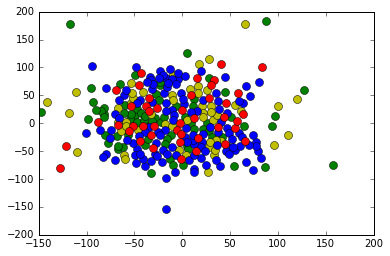

In [15]:
#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    lsum = len(summer_vecs)
    lspr = len(spring_vecs)
    lwint = len(winter_vecs)
    if i < lsum:
        #summer_vecs words colored green
        color = 'g'
        label = 'summer'
    elif i >= lsum and i < (lsum + lspr):
        #spring_vecs words colored yellow
        color = 'y'
        label = 'spring'
    elif i >= (lsum + lspr) and i < ((lsum + lspr) + lwint):
        #winter_vecs words colored blue
        color = 'b'
        label = 'winter'
    else:
        #fall_vecs words colored red
        color = 'r'
        label = 'fall'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color, label=label, markersize=8)

### Let's see if LDA can do better than the human classification

In [251]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download("stopwords") 
from gensim import corpora, models

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
tokenizer = RegexpTokenizer(r'\w+')

In [28]:
doc_set = [summer_words, spring_words, winter_words, fall_words]

In [31]:
def removeEndLine(words):
    i = 0
    for word in words:
        words[i] = word.replace('\n', '')
        i += 1
    return words
i = 0
for doc in doc_set:
    doc_set[i] = removeEndLine(doc)
    i += 1

In [238]:
texts = []
stop = set(stopwords.words('english'))
for doc in doc_set:
    subtexts = []
    for i in doc:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        
        for j in tokens:
            # add words in tokens to sublist
            if j not in stop:
                subtexts.append(j)
    # add final list of words for this document to texts
    texts.append(subtexts)

In [239]:
texts

[['air',
  'conditioner',
  'august',
  'backpacking',
  'baseball',
  'bathing',
  'suit',
  'beach',
  'berries',
  'bikini',
  'blistering',
  'heat',
  'boating',
  'camp',
  'camping',
  'canoeing',
  'daisy',
  'diving',
  'ease',
  'fan',
  'flowers',
  'fourth',
  'july',
  'fresh',
  'fruit',
  'frisbee',
  'gardening',
  'grass',
  'heat',
  'hiking',
  'holiday',
  'hot',
  'humidity',
  'ice',
  'cream',
  'independence',
  'day',
  'journey',
  'july',
  'july',
  'fourth',
  'june',
  'lightning',
  'muggy',
  'ocean',
  'outdoors',
  'outings',
  'outside',
  'park',
  'picnic',
  'play',
  'popsicle',
  'recreation',
  'relax',
  'rest',
  'road',
  'trip',
  'rose',
  'sandals',
  'sandcastle',
  'sailing',
  'sea',
  'searing',
  'heat',
  'seashore',
  'season',
  'shorts',
  'showers',
  'sightseeing',
  'stifling',
  'summer',
  'summer',
  'solstice',
  'sun',
  'sundress',
  'sunflower',
  'sunhat',
  'sunny',
  'sunscreen',
  'sweltering',
  'swim',
  'swim',
  

In [240]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

In [241]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [291]:
# generate LDA model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20, random_state=42)

In [292]:
print(ldamodel.print_topics(num_topics=4, num_words=10))

[(0, u'0.016*pumpkin + 0.016*web + 0.016*harvest + 0.016*leaves + 0.016*hay + 0.016*spider + 0.009*season + 0.009*raincoat + 0.009*equinox + 0.009*sleet'), (1, u'0.021*spring + 0.015*baby + 0.008*baseball + 0.008*grass + 0.008*windy + 0.008*june + 0.008*season + 0.008*flowers + 0.008*thaw + 0.008*rain'), (2, u'0.039*ice + 0.016*gingerbread + 0.012*cold + 0.008*cap + 0.008*hockey + 0.008*stove + 0.008*freezing + 0.008*snow + 0.008*storm + 0.008*sled'), (3, u'0.017*heat + 0.017*july + 0.012*swim + 0.012*trip + 0.012*fourth + 0.012*summer + 0.007*weather + 0.007*showers + 0.007*june + 0.007*flowers')]


In [293]:
# Stopping By Woods On A Snowy Evening - Poem by Robert Frost
test = """Whose woods these are I think I know.
His house is in the village, though; 
He will not see me stopping here
To watch his woods fill up with snow.

My little horse must think it queer
To stop without a farmhouse near
Between the woods and frozen lake
The darkest evening of the year.

He gives his harness bells a shake
To ask if there is some mistake.
The only other sound's the sweep
Of easy wind and downy flake.

The woods are lovely, dark and deep,
But I have promises to keep,
And miles to go before I sleep,
And miles to go before I sleep. """

In [294]:
test_lda = ldamodel[dictionary.doc2bow(clean(test))]
test_lda

[(0, 0.041734911279582676),
 (1, 0.041729989258065633),
 (2, 0.87481607465546385),
 (3, 0.041719024806887814)]

In [295]:
# Sonnet 18: Shall I Compare Thee To A Summer's Day? - Poem by William Shakespeare
test2 = """Shall I compare thee to a summer's day?
Thou art more lovely and more temperate.
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date.
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimmed;
And every fair from fair sometime declines,
By chance, or nature's changing course untrimmed.
But thy eternal summer shall not fade
Nor lose possession of that fair thou ow'st;
Nor shall death brag thou wand'rest in his shade,
When in eternal lines to time thou grow'st,
So long as men can breathe or eyes can see,
So long lives this, and this gives life to thee."""

In [296]:
pat = "['\s.,\/?#!$%\^&\*;:{}=\-_`~()]*"
def clean(para):
    return [word for word in re.split(pat, para.lower()) if word not in stop]

In [297]:
test_lda2 = ldamodel[dictionary.doc2bow(clean(test2))]
test_lda2

[(0, 0.025057249026070576),
 (1, 0.3199801643495182),
 (2, 0.025209252030489369),
 (3, 0.62975333459392191)]

In [298]:
# After Apple Picking - Poem by Robert Frost
test3 = """My long two-pointed ladder's sticking through a tree 
Toward heaven still. 
And there's a barrel that I didn't fill 
Beside it, and there may be two or three 
Apples I didn't pick upon some bough. 
But I am done with apple-picking now. 
Essence of winter sleep is on the night, 
The scent of apples; I am drowsing off. 
I cannot shake the shimmer from my sight 
I got from looking through a pane of glass 
I skimmed this morning from the water-trough, 
And held against the world of hoary grass. 
It melted, and I let it fall and break. 
But I was well 
Upon my way to sleep before it fell, 
And I could tell 
What form my dreaming was about to take. 
Magnified apples appear and reappear, 
Stem end and blossom end, 
And every fleck of russet showing clear. 
My instep arch not only keeps the ache, 
It keeps the pressure of a ladder-round. 
And I keep hearing from the cellar-bin 
That rumbling sound 
Of load on load of apples coming in. 
For I have had too much 
Of apple-picking; I am overtired 
Of the great harvest I myself desired. 
There were ten thousand thousand fruit to touch, 
Cherish in hand, lift down, and not let fall, 
For all 
That struck the earth, 
No matter if not bruised, or spiked with stubble, 
Went surely to the cider-apple heap 
As of no worth. 
One can see what will trouble 
This sleep of mine, whatever sleep it is. 
Were he not gone, 
The woodchuck could say whether it's like his 
Long sleep, as I describe its coming on, 
Or just some human sleep."""

In [299]:
test_lda3 = ldamodel[dictionary.doc2bow(clean(test3))]
test_lda3

[(0, 0.54594474787614278),
 (1, 0.2980975492668948),
 (2, 0.075185918282563186),
 (3, 0.080771784574399277)]

In [300]:
# A Prayer In Spring - Poem by Robert Frost
test4 = """Sound the flute!
Now it's mute!
Bird's delight,
Day and night,
Nightingale,
In the dale,
Lark in sky,--
Merrily,
Merrily merrily, to welcome in the year.

Little boy,
Full of joy;
Little girl,
Sweet and small;
Cock does crow,
So do you;
Merry voice,
Infant noise;
Merrily, merrily, to welcome in the year.

Little lamb,
Here I am;
Come and lick
My white neck;
Let me pull
Your soft wool;
Let me kiss
Your soft face;
Merrily, merrily, to welcome in the year."""

In [302]:
test_lda4 = ldamodel[dictionary.doc2bow(clean(test4))]
test_lda4

[(0, 0.062852172154806915),
 (1, 0.319959035730012),
 (2, 0.30315578289502887),
 (3, 0.31403300922015226)]

In [303]:
ldawordlist = []
ldaimptlist = []
for pair in ldamodel.print_topics(num_topics=4, num_words=10):
    intwordlist = []
    intimplist = []
    for wordimport in pair[1].split('+'):
        intwordlist.append(wordimport.split('*')[1].encode('ascii','ignore').strip())
        intimplist.append(wordimport.split('*')[0])
    ldawordlist.append(intwordlist)
    ldaimptlist.append(intimplist)

In [171]:
ldawordlist_vecs = []
for words in ldawordlist:
    ldawordlist_vecs.append(getWordVecs(words))

In [305]:
ldafall_vec = getWordVecs(ldawordlist[0])
ldaspring_vec = getWordVecs(ldawordlist[1])
ldawinter_vec = getWordVecs(ldawordlist[2])
ldasummer_vec = getWordVecs(ldawordlist[3])

In [199]:
lda_reduced_vecs = ts.fit_transform(np.concatenate((ldafall_vec, ldaspring_vec, ldawinter_vec, ldasummer_vec)))

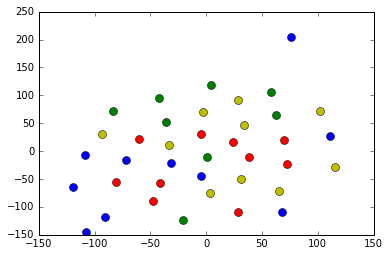

In [306]:
#color points by word group to see if Word2Vec can separate them
for i in range(len(lda_reduced_vecs)):
    lfall = len(ldafall_vec)
    lspr = len(ldaspring_vec)
    lwint = len(ldawinter_vec)
    if i < lfall:
        #fall_vecs words colored red
        color = 'r'
        label = 'fall'
    elif i >= lfall and i < (lfall + lspr):
        #spring_vecs words colored yellow
        color = 'y'
        label = 'spring'
    elif i >= (lfall + lspr) and i < ((lfall + lspr) + lwint):
        #winter_vecs words colored blue
        color = 'b'
        label = 'winter'
    else:
        #summer_vecs words colored green
        color = 'g'
        label = 'summer'
    plt.plot(lda_reduced_vecs[i,0], lda_reduced_vecs[i,1], marker='o', color=color, label=label, markersize=8)